# Principal Component Analysis

The first goal of this assignment is to use pca to reduce the dimensions of a 2d dataset to a single dimension. Although this would not be done in practice, it offers a more intuitive understanding of the purpose of dimensionality reduction and its ability to catpure most of the variance of the original data.

In [1]:
import numpy as np
import scipy.io
from scipy import ndimage
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
colors = sns.color_palette()

In [3]:
mat = scipy.io.loadmat('ex7data1.mat')

In [4]:
# Two dimensional data.

X = mat['X']

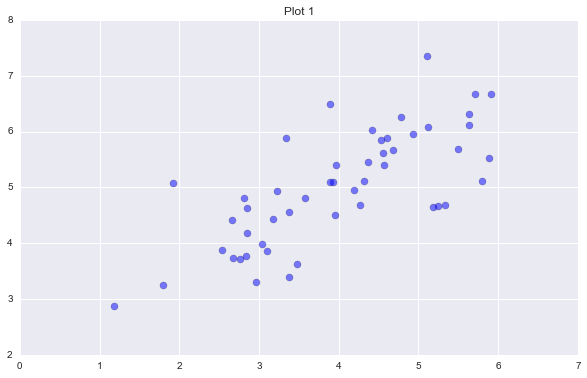

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], s = 50, alpha = 0.5)

plt.title('Plot 1');

In [6]:
def feature_normalize(X):
    
    # Normalize data to have a mean of 0 and a standard deviation of 1.
    
    mu = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    
    X_norm = (X - mu)/std
    
    return X_norm, mu, std

In [7]:
def pca(X):
    
    # Computes the covariance matrix sigma, and the single value decomposition for that matrix.
    # Returns eigenvectors U and eigenvalues S.
    
    m,n = np.shape(X)
    sigma = X.T.dot(X)/m
    U, S, V = np.linalg.svd(sigma)
    
    return U, S

In [8]:
X_norm, mu, std = feature_normalize(X)

In [9]:
U, S = pca(X_norm)

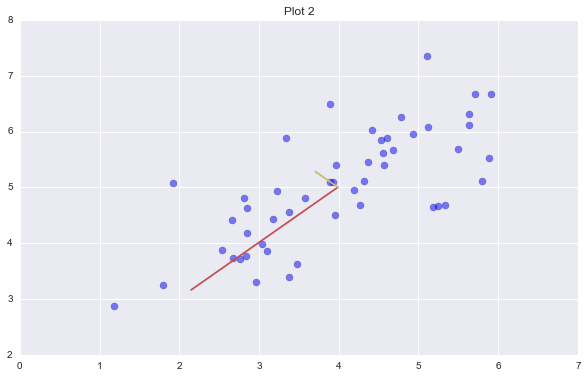

In [10]:
# Draw the eigenvectors centered at mean of data. 

x2 = mu + 1.5 * S[0] * U[:,0]
x3 = mu + 1.5 * S[1] * U[:,1]

plt.figure(figsize=(10,6))

plt.plot([mu[0], x2[0]], [mu[1], x2[1]], c = colors[2])
plt.plot([mu[0], x3[0]], [mu[1], x3[1]], c = colors[4])

plt.scatter(X[:,0],X[:,1], s = 50, alpha = 0.5)

plt.title('Plot 2');

By drawing the eigenvectors we observe the directions that display the greatest variance of the data.

In [11]:
def project_data(X, U, K):
    
    # Returns original data projected onto first K principal components.
    
    U_reduce = U[:,:K]
    Z = X.dot(U_reduce)
    
    return Z

In [12]:
def recover_data(Z, U, K):
    
    # Recovers an approximation of the original data using the projected data.
    
    U_reduce = U[:,:K]
    X_rec = Z.dot(U_reduce.T)
    
    return X_rec

In [13]:
# Project data.
Z = project_data(X_norm, U, 1)

# Recover approximations in original dimensions.
X_rec = recover_data(Z, U, 1)

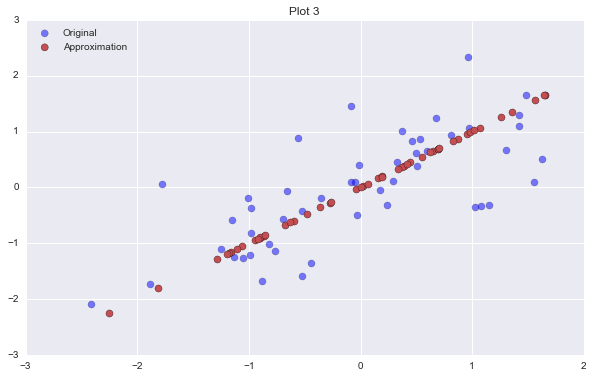

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(X_norm[:,0], X_norm[:,1], s = 50, alpha = 0.5)
plt.scatter(X_rec[:,0],X_rec[:,1], s = 50, c = colors[2])
plt.legend(['Original', 'Approximation'], loc = 'upper left')

plt.title('Plot 3');

In the image above we observe the effects of projection and recovery. First the data is projected onto the first principal component, resulting in the 1d array Z. Z is then used to return the data to its original dimensional space and is plotted in red. The red points no longer express the variance in the direction of the 2nd eigenvector (as seen in plot 2), and instead lie entirely upon the first.

# PCA Application

Using the same process as outlined above, this section of the assignment applies principal component analysis on a real world dataset of face images. The PCA algorithm reduces the dimension of the data and helps visualize the original faces, principal components, and recovered approximations of the faces. 

In [15]:
# X_faces is a 5000 x 1024 matrix where each row is a reshaped 32 x 32 greyscale
# image of a face.

mat2 = scipy.io.loadmat('ex7faces.mat')

X_faces = mat2['X']

In [16]:
def display_data(X):
    
    # Display first 25 faces
   
    fig, axs = plt.subplots(5, 5,figsize=(10,10))
    
    i = 0

    for ax in axs.reshape(-1):
        
        face = X[i,:]
        face_mat = face.reshape(32, 32)
        rotated_face = scipy.ndimage.rotate(face_mat, -90)
          
        ax.imshow(rotated_face, cmap = 'gray',)
        ax.grid(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        i += 1

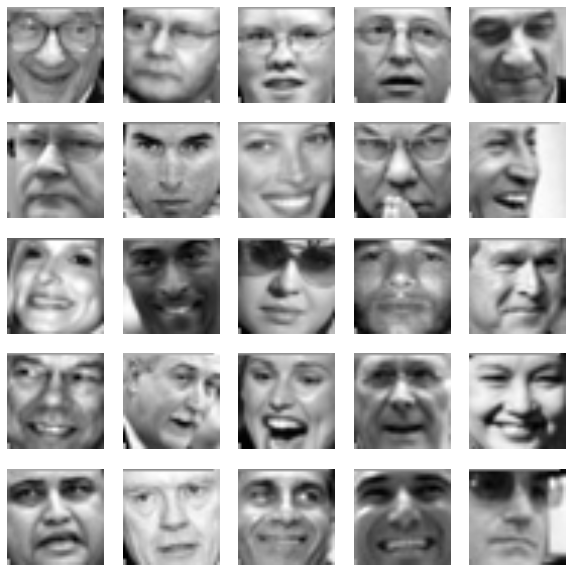

In [17]:
display_data(X_faces)

In [18]:
# Normalize face data.

X_faces_norm, mu, std = feature_normalize(X_faces)

In [19]:
# Compute eigen vectots/values

U, S = pca(X_faces_norm)

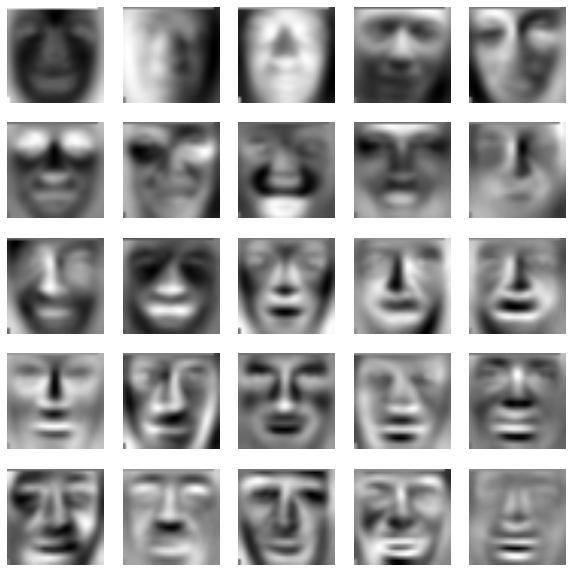

In [20]:
# U is a 1024 x 1024 matrix, by reshaping each row of U into the original 
# pictures' scale (32*32) we can visualize the principal components of the face data.

# *Note: These images do not correspond to the original faces, they are instead the 
# eigenvectors used to express the maximum variance of the data.

display_data(U.T)

In [21]:
# Project original data onto first 100 principal components so each face is now
# represented by 100 features vs. the original 1024.

K = 100
Z = project_data(X_faces_norm, U, K)

To visualize what is lost in the process of PCA we can use the recover_data function to turn the projected data into an approximation in the original dimension (similar to above in the 2d example). The reconstruction allows to see that the general shape of the face is maintained, despite the loss of finer details.

In [22]:
X_rec  = recover_data(Z, U, K)

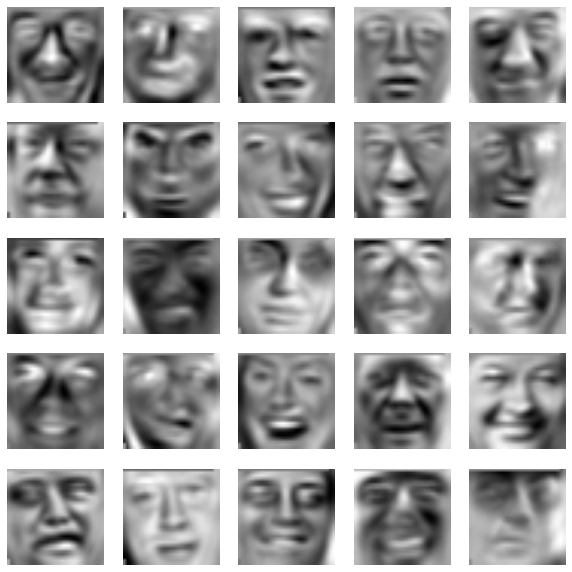

In [23]:
# Recovered image data.

display_data(X_rec)

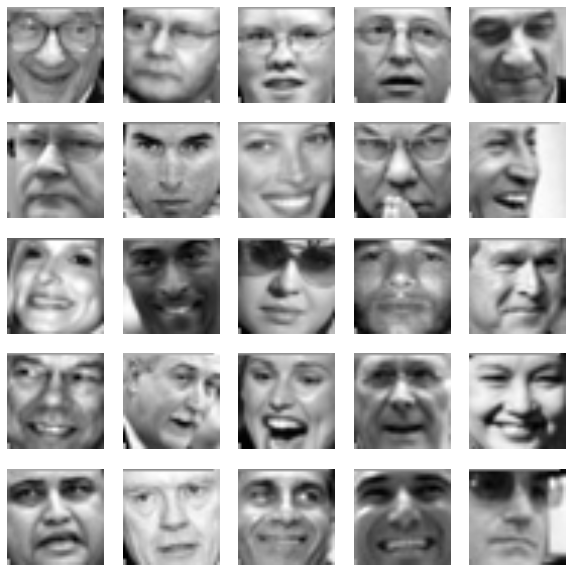

In [24]:
# Original image data.

display_data(X_faces)